In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
titanic_data =  pd.read_csv(r"E:\Users\Documents\College\Engineering\F.E. Eng\ACAIDS\titanic\train.csv")

In [28]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


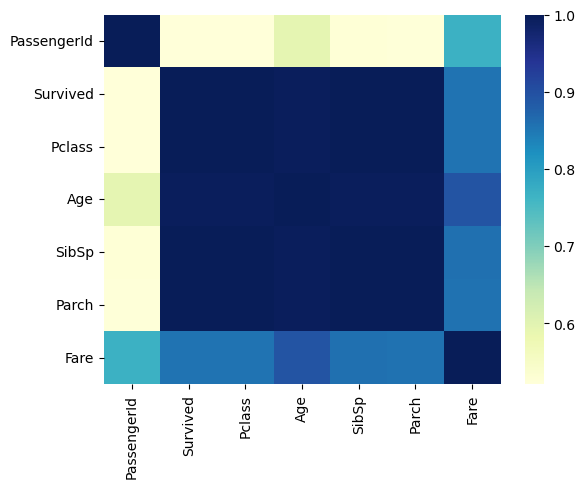

In [29]:
import seaborn as sns

sns.heatmap(titanic_data.describe().corr(), cmap="YlGnBu")
plt.show()

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

In [32]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.2500,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
603,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S


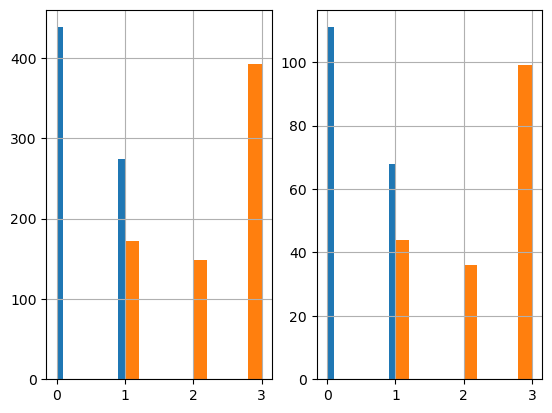

In [36]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

In [37]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 273 to 809
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          567 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X

In [42]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()

        column_names = ["C", "S", "Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[["Sex"]]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X

In [43]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticker","Cabin","Sex","N"], axis=1, errors="ignore")

In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureencoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

In [46]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [47]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,C,S,Q,Female,Male
273,274,0,1,37.00000,0,1,PC 17596,29.7000,1.0,0.0,0.0,0.0,1.0
89,90,0,3,24.00000,0,0,343275,8.0500,0.0,0.0,1.0,0.0,1.0
66,67,1,2,29.00000,0,0,C.A. 29395,10.5000,0.0,0.0,1.0,1.0,0.0
277,278,0,2,29.41388,0,0,239853,0.0000,0.0,0.0,1.0,0.0,1.0
730,731,1,1,29.00000,0,0,24160,211.3375,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,243,0,2,29.00000,0,0,W./C. 14263,10.5000,0.0,0.0,1.0,0.0,1.0
792,793,0,3,29.41388,8,2,CA. 2343,69.5500,0.0,0.0,1.0,1.0,0.0
67,68,0,3,19.00000,0,0,S.P. 3464,8.1583,0.0,0.0,1.0,0.0,1.0
850,851,0,3,4.00000,4,2,347082,31.2750,0.0,0.0,1.0,0.0,1.0


In [48]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 273 to 809
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Ticket       712 non-null    object 
 7   Fare         712 non-null    float64
 8   C            712 non-null    float64
 9   S            712 non-null    float64
 10  Q            712 non-null    float64
 11  Female       712 non-null    float64
 12  Male         712 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 77.9+ KB


In [51]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Survived", "Ticket"], axis=1)
y = strat_train_set["Survived"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [58]:
final_clf = grid_search.best_estimator_

In [59]:
final_clf

RandomForestClassifier(max_depth=5, n_estimators=200)

In [ ]:
Ytrain_pred_rfc_gs=rfc.predict(X_train)
Ytest_pred_rfc_gs=rfc.predict(X_test)
print("training accuracy:",accuracy_score(Y_train,Ytrain_pred_rfc_gs))
print("testing accuracy:",accuracy_score(Y_test,Ytest_pred_rfc_gs))